## Schrodinger equation for H atom
### Radial part:
$$ \left(-\frac{\hbar^2}{2\mu}\frac{1}{r^2} \frac{d}{dr}\left(r^2\frac{d}{dr}\right) + \frac{l(l+1)\hbar^2}{2\mu^2}\frac{1}{r^2} -\frac{Ze^2}{4\pi\varepsilon_0 r}\right)R(r)=ER(r)  $$

Let's try the following trial wavefunction:
$$ \psi(r)\propto exp(-\alpha r /a_0 ) $$, where $$ \alpha > 0$$ is a variational parameter

Energy = -0.14996249063390515 at alpha = 0.0
Energy = -0.15762417913058377 at alpha = 0.050505050505050504
Energy = -0.17062656997046824 at alpha = 0.10101010101010101
Energy = -0.1888661271403776 at alpha = 0.15151515151515152
Energy = -0.21174081908298112 at alpha = 0.20202020202020202
Energy = -0.23815834319830226 at alpha = 0.25252525252525254
Energy = -0.266724783790899 at alpha = 0.30303030303030304
Energy = -0.29602813265383876 at alpha = 0.35353535353535354
Energy = -0.32487526765990765 at alpha = 0.40404040404040403
Energy = -0.35239736527278026 at alpha = 0.45454545454545453
Energy = -0.3780345568207904 at alpha = 0.5050505050505051
Energy = -0.40146030733179844 at alpha = 0.5555555555555556
Energy = -0.4224989971759679 at alpha = 0.6060606060606061
Energy = -0.4410622245260844 at alpha = 0.6565656565656566
Energy = -0.45710786880279997 at alpha = 0.7070707070707071
Energy = -0.4706167771115578 at alpha = 0.7575757575757576
Energy = -0.4815805907831832 at alpha = 0.8080808080

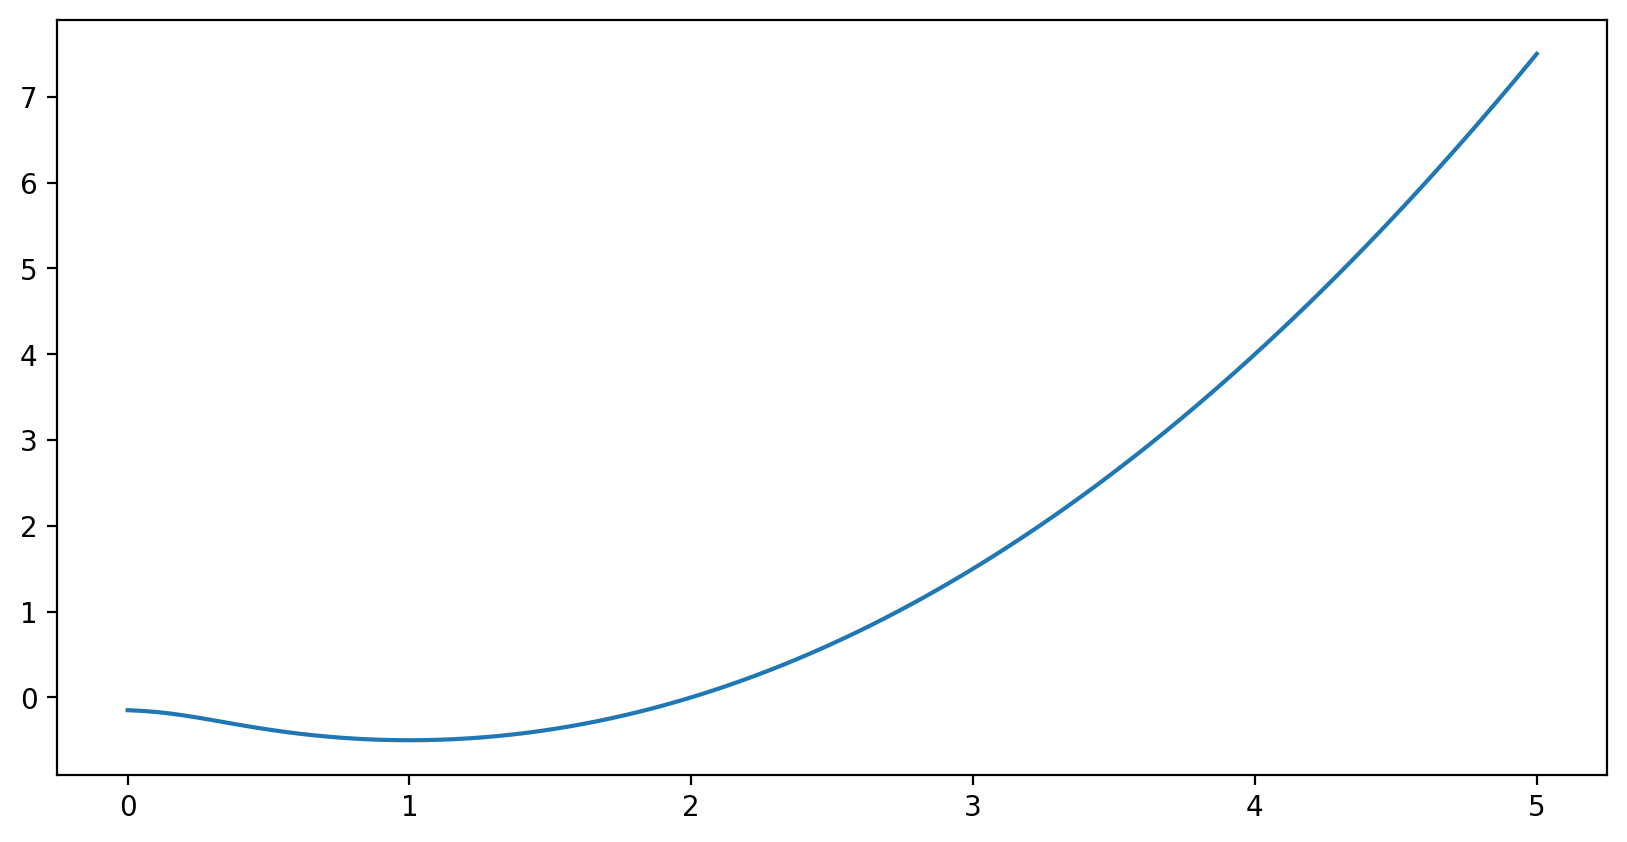

In [96]:
import sys, math, os
import numpy as np
import matplotlib.pyplot as plt  # where plt is just the standard name

# we use atomic units
hbar=1
me=1  # mass of electron
ee=1  # charhe of electron
mu=1  # reduced mass
l=0  # orbital quantum number l
Z=1   # atomic number (nuclear charge)

# grid for r coordinate - we start from r>0 to avoid numerical division by 0
# grid will affect the precise numerical value of energy
a = 0.000001
b = 10.0
N = 2000
r = np.linspace(a,b,N)

# we use an exponential trial function
alpha = 1
def tr_func(alpha=1):
    return np.exp(-alpha*r)

# first derivative matrix
der = np.zeros((len(r),len(r)))
der = -np.eye(len(r)) + np.diagflat(np.ones(len(r)-1),1)
dr = r[1]-r[0]
der  /= dr

# compute variational energy E = <psi\H-bar\psi>/<psi\psi>
def var_energy(alpha):
    ene = (np.sum(tr_func(alpha)*(-1/2*(der@(r**2*(der@tr_func(alpha))))/r**2-Z/r*tr_func(alpha)+(l*(l+1)/2/r**2)*tr_func(alpha))*4*math.pi*r**2)*(b-a)/N) / (np.sum(tr_func(alpha)*tr_func(alpha)*4*math.pi*r**2)*(b-a)/N)
    print ("Energy =", ene, "at alpha =",alpha)
    return ene

# look at dependence of energy on alpha
alphas = np.linspace(0.0,5.0,100)
energies = np.zeros(len(alphas))
min_ene = 1.0
opt_alpha = 0.0
for i in range(len(alphas)):
    energies[i] = var_energy(alphas[i])
    if energies[i]<min_ene :
        min_ene = energies[i]
        opt_alpha = alphas[i]

fig = plt.figure(figsize=(10,5), dpi=200)
plt.plot(alphas,energies)
print ("Minimum energy = ", min_ene, "found at alpha = ", opt_alpha)

# the exact answer is E=-0.5 at alpha=1. We could modify grids or code function minimization to obtain a more accurate value
    

## Here is your turn:
1. Find the variational energy of H atom using a gaussian trial function $$ \psi(r)\propto exp(-\alpha (r /a_0)^2 )$$
2. Try to find a lower energy by using two gaussian functions as a trial function, i.e., $$ \psi(r)\propto C_1 exp(-\alpha_1 (r /a_0)^2 ) + C_2 exp(-\alpha_2 (r /a_0)^2 )$$ Make sure that this function is properly normalized!